In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman')
import proplot as plot

In [2]:
L=420e-6
H=80e-6
Pe = 0.01
DO2 = 7.63596e-6
H = 80e-6
w=20e-6
U_0 = Pe*DO2/w
umax=1.5*U_0

# Validate Ux 

## Read Centerline x from COMSOL

In [3]:
x_centerline_file_comsol="./plots/output-x-centerline.txt"
with open(x_centerline_file_comsol,"r") as fp:
    lines=fp.readlines()
    header=lines[8]
header=re.split(r" +(?![t@(])",header)
header.pop(0)
header[-1]=header[-1].strip()
df_comsol_x_centerline = pd.read_csv(x_centerline_file_comsol, comment='%', sep='\\s+', header=None,names=header)
df_comsol_x_centerline.sort_values(by="x",inplace=True)
df_comsol_x_centerline.reset_index(drop=True,inplace=True)
df_comsol_x_centerline.fillna(0,inplace=True)
df_comsol_x_centerline.head()

,x,y,u (m/s) @ t=0.002,T (K) @ t=0.002,c_O2 (mol/m^3) @ t=0.002,c_CO2 (mol/m^3) @ t=0.002,u (m/s) @ t=0.004,T (K) @ t=0.004,c_O2 (mol/m^3) @ t=0.004,c_CO2 (mol/m^3) @ t=0.004,...,c_O2 (mol/m^3) @ t=0.02,c_CO2 (mol/m^3) @ t=0.02,u (m/s) @ t=0.04,T (K) @ t=0.04,c_O2 (mol/m^3) @ t=0.04,c_CO2 (mol/m^3) @ t=0.04,u (m/s) @ t=0.06,T (K) @ t=0.06,c_O2 (mol/m^3) @ t=0.06,c_CO2 (mol/m^3) @ t=0.06
0,0.000000e+00,0.00004,0.005727,773.000000,34.209695,0.000000,0.005727,773.000000,34.209695,0.000000,...,34.209695,0.000000,0.005727,773.000000,34.209695,0.000000,0.005727,773.000000,34.209695,0.000000
1,1.198662e-10,0.00004,0.005727,773.000012,34.209677,0.000003,0.005727,773.000045,34.209677,0.000008,...,34.209658,0.000038,0.005727,773.000966,34.209658,0.000040,0.005727,773.001176,34.209658,0.000040
2,2.930714e-06,0.00004,0.005707,773.304191,33.756060,0.069902,0.005707,774.109117,33.760584,0.198267,...,33.309360,0.925493,0.005707,796.624338,33.308619,0.977336,0.005707,801.757092,33.308534,0.984568
3,5.856840e-06,0.00004,0.005719,773.608555,33.302293,0.139919,0.005719,775.218488,33.311231,0.396767,...,32.408589,1.851631,0.005719,820.244973,32.407106,1.955343,0.005719,830.509457,32.406936,1.969811
4,5.858781e-06,0.00004,0.005719,773.608757,33.301992,0.139966,0.005719,775.219224,33.310933,0.396898,...,32.407991,1.852246,0.005719,820.260646,32.406508,1.955992,0.005719,830.528535,32.406338,1.970465


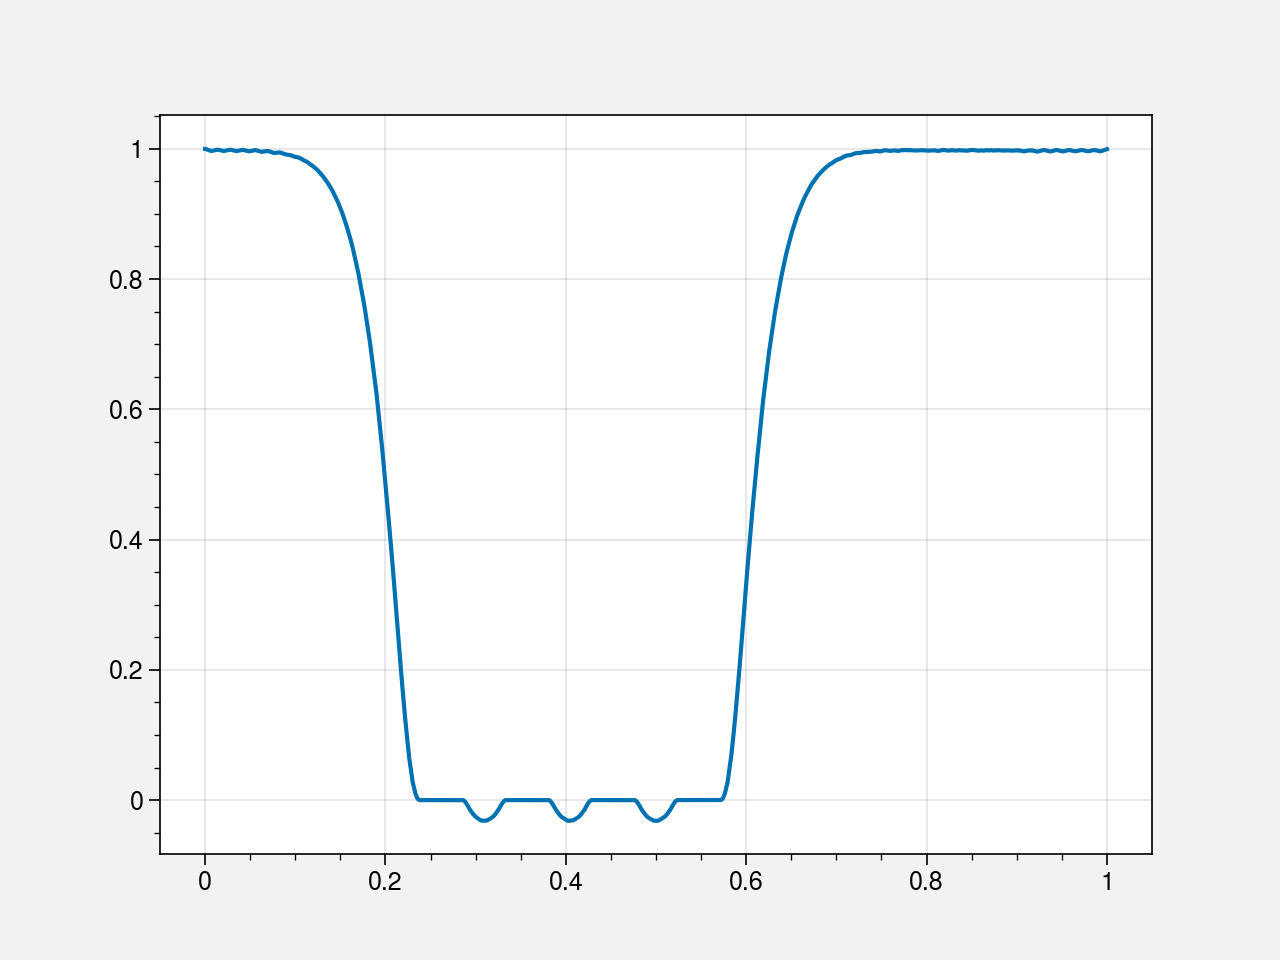

In [4]:
plt.plot(df_comsol_x_centerline["x"]/L,df_comsol_x_centerline["u (m/s) @ t=0.002"]/umax)

In [5]:
## Read Centerline Ux from DBS

In [6]:
x_centerline_file_dbs="../postProcessing/singleGraph/1.5/x-centerline_U.csv"
df_dbs_x_centerline=pd.read_csv(x_centerline_file_dbs)
df_dbs_x_centerline.head()

,x,U_0,U_1,U_2
0,5.000000e-07,0.005725,9.104440e-10,0
1,1.500000e-06,0.005725,1.805210e-09,0
2,2.500000e-06,0.005725,2.248310e-09,0
3,3.500000e-06,0.005725,2.125960e-09,0
4,4.500000e-06,0.005725,1.379750e-09,0


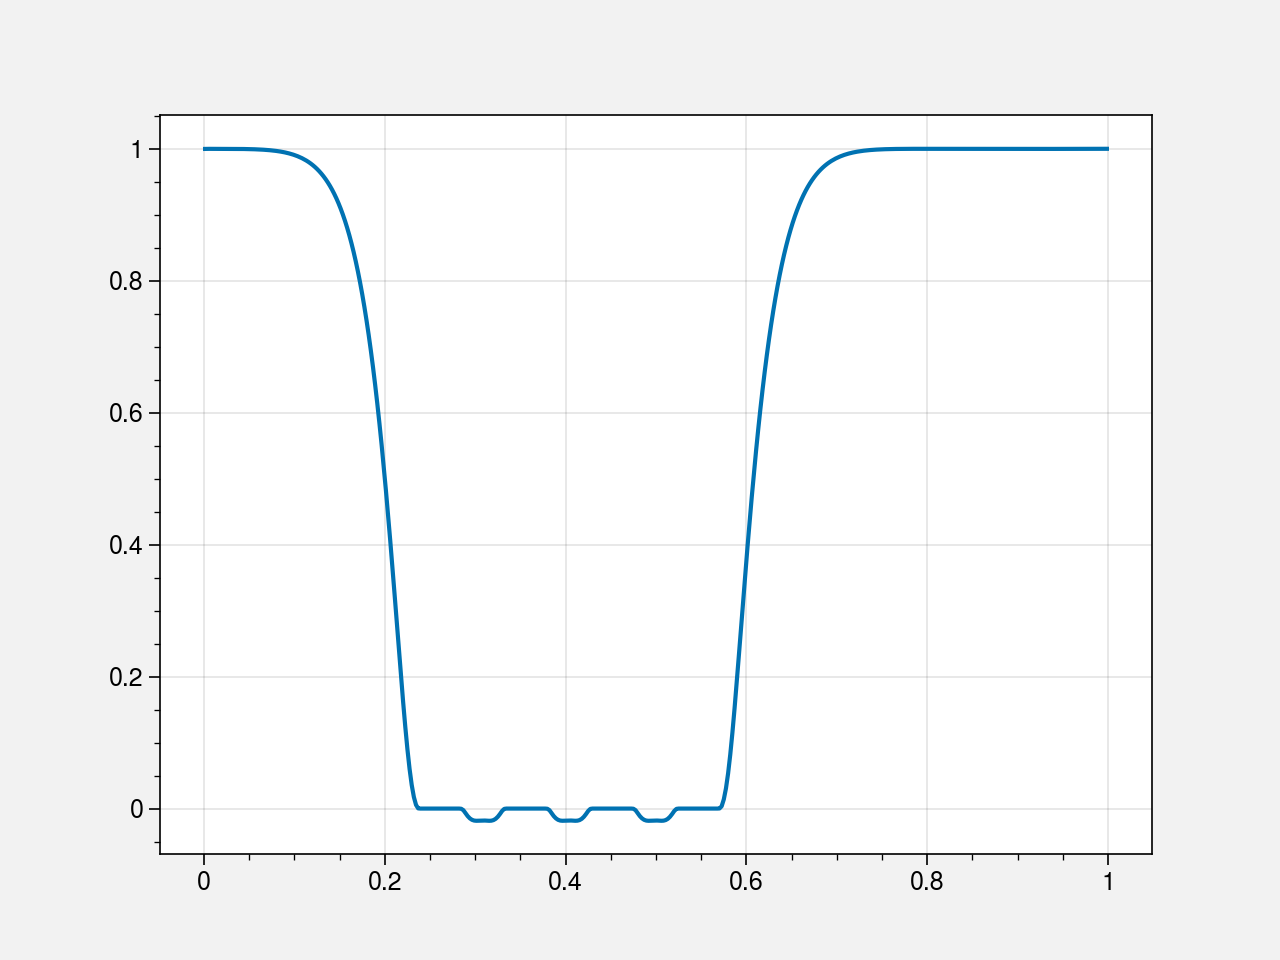

In [7]:
plt.plot(df_dbs_x_centerline["x"]/L,df_dbs_x_centerline["U_0"]/umax)

## Compare Ux at x centerline

### calculate ux relative error

In [8]:
interp_f1=interpolate.interp1d(df_comsol_x_centerline["x"],df_comsol_x_centerline["u (m/s) @ t=0.002"],kind="linear")
df_comsol_x_centerline_interpolated=interp_f1(df_dbs_x_centerline["x"])

In [9]:
relative_error_ux=0.0
num=0
for i in df_dbs_x_centerline.index:
    benmark=df_comsol_x_centerline_interpolated[i]
    dbs=df_dbs_x_centerline["U_0"][i]
    if(benmark>1e-16):
        num+=1
        error=(dbs-benmark)/benmark   
        relative_error_ux+=pow(error,2)

relative_error_ux=math.sqrt(relative_error_ux)/num
print(f"non-zero ux num: {num}")
print(f"relative_error_ux: {relative_error_ux*100}%")


non-zero ux num: 280
relative_error_ux: 2.019444570762702%


<ipython-input-10-28da957b9902>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(df_dbs_x_centerline_sampling["x"]/L,df_dbs_x_centerline_sampling["U_0"]/umax,color="",marker="o",s=15,edgecolors="r",label="DBS")


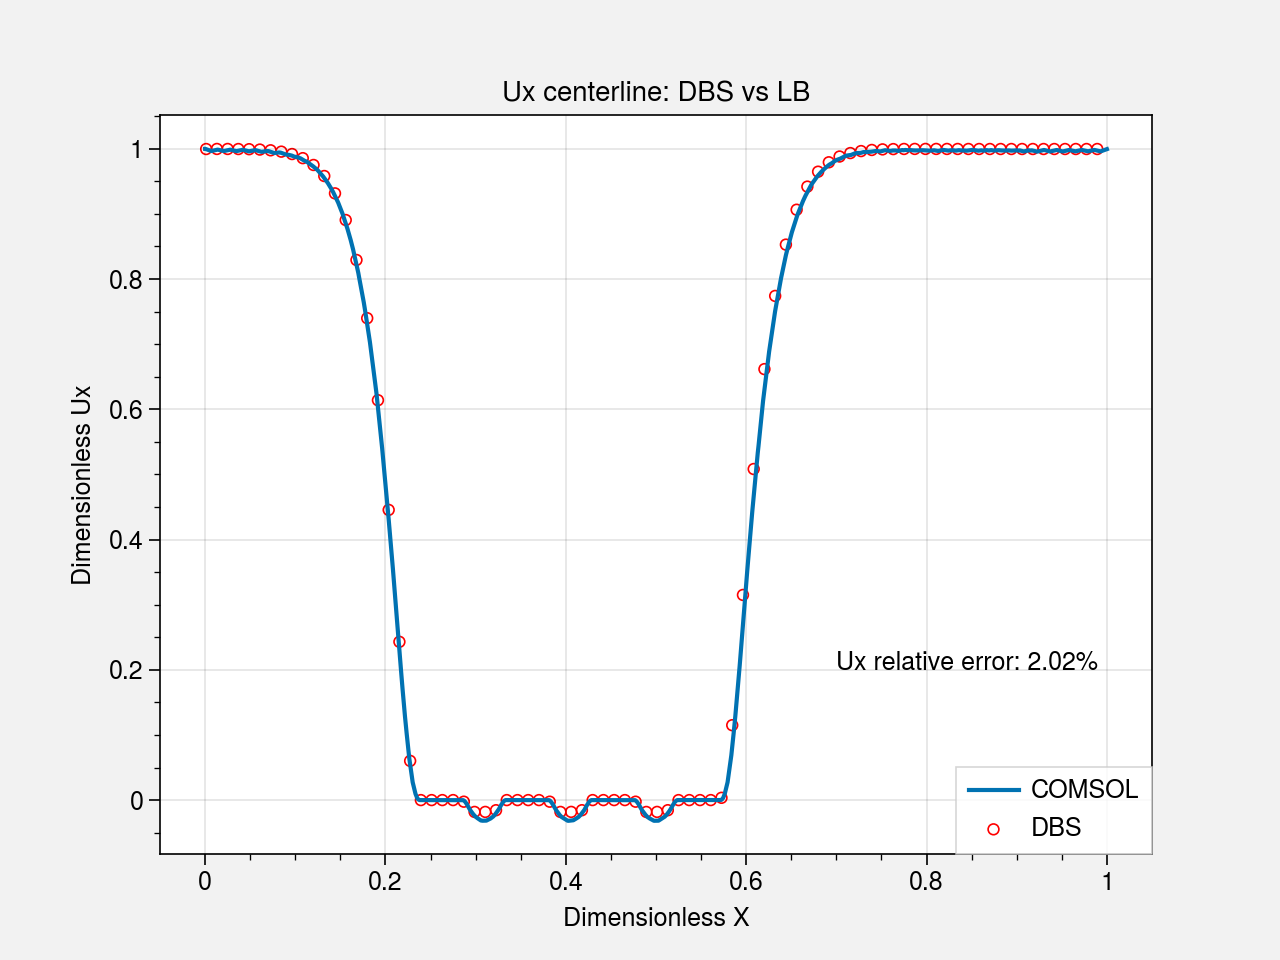

In [10]:
df_dbs_x_centerline_sampling=df_dbs_x_centerline[df_dbs_x_centerline.index%5==0]
fig, ax = plt.subplots()
ax.plot(df_comsol_x_centerline["x"]/L,df_comsol_x_centerline["u (m/s) @ t=0.002"]/umax,label="COMSOL")
ax.scatter(df_dbs_x_centerline_sampling["x"]/L,df_dbs_x_centerline_sampling["U_0"]/umax,color="",marker="o",s=15,edgecolors="r",label="DBS")
ax.set_xlabel("Dimensionless X")
ax.set_ylabel("Dimensionless Ux")
ax.set_title("Ux centerline: DBS vs LB")
ax.text(0.7,0.2,"Ux relative error: {:.2f}%".format(relative_error_ux*100))
ax.legend(loc="lower right")

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_comsol_x_centerline["x"]/L,df_comsol_x_centerline["u (m/s) @ t=0.002"]/umax,label="COMSOL")
ax.scatter(df_dbs_x_centerline_sampling["x"]/L,df_dbs_x_centerline_sampling["U_0"]/umax,color="",marker="o",s=15,edgecolors="r",label="DBS")

## Validate Ux at first obstacle y centerline

## read Ux at first-obstacle-y-centerline from COMSOL 

In [11]:
x_centerline_2_file_comsol="./plots/output-first-obstacle-y-centerline.txt"
with open(x_centerline_2_file_comsol,"r") as fp:
    lines=fp.readlines()
    header=lines[8]
header=re.split(r" +(?![t@(])",header)
header.pop(0)
header[-1]=header[-1].strip()
df_comsol_x_centerline_2 = pd.read_csv(x_centerline_2_file_comsol, comment='%', sep='\\s+', header=None,names=header)
df_comsol_x_centerline_2.sort_values(by="y",inplace=True)
df_comsol_x_centerline_2.reset_index(drop=True,inplace=True)
df_comsol_x_centerline_2.fillna(0,inplace=True)
print(f"shape: {df_comsol_x_centerline_2.shape}")
df_comsol_x_centerline_2.head()

shape: (105, 34)


,x,y,u (m/s) @ t=0.002,T (K) @ t=0.002,c_O2 (mol/m^3) @ t=0.002,c_CO2 (mol/m^3) @ t=0.002,u (m/s) @ t=0.004,T (K) @ t=0.004,c_O2 (mol/m^3) @ t=0.004,c_CO2 (mol/m^3) @ t=0.004,...,c_O2 (mol/m^3) @ t=0.02,c_CO2 (mol/m^3) @ t=0.02,u (m/s) @ t=0.04,T (K) @ t=0.04,c_O2 (mol/m^3) @ t=0.04,c_CO2 (mol/m^3) @ t=0.04,u (m/s) @ t=0.06,T (K) @ t=0.06,c_O2 (mol/m^3) @ t=0.06,c_CO2 (mol/m^3) @ t=0.06
0,0.00011,0.000000e+00,0.000000,783.708633,16.840343,2.959768,0.000000,810.581062,16.552441,7.868380,...,2.976611,31.893493,0.000000,1548.479810,2.958204,33.944359,0.000000,1732.082254,2.956338,34.230463
1,0.00011,1.188725e-07,0.000117,783.708810,16.840325,2.959799,0.000117,810.581593,16.552391,7.868444,...,2.976439,31.893684,0.000117,1548.487363,2.958032,33.944548,0.000117,1732.090163,2.956166,34.230652
2,0.00011,4.980255e-07,0.000491,783.709373,16.840269,2.959898,0.000491,810.583286,16.552232,7.868647,...,2.975890,31.894293,0.000491,1548.511454,2.957483,33.945152,0.000491,1732.115387,2.955617,34.231255
3,0.00011,6.406725e-07,0.000626,783.710053,16.840200,2.960017,0.000626,810.585331,16.552039,7.868893,...,2.975226,31.895029,0.000626,1548.540556,2.956820,33.945881,0.000626,1732.145861,2.954954,34.231984
4,0.00011,1.095656e-06,0.001056,783.712223,16.839980,2.960397,0.001056,810.591854,16.551423,7.869677,...,2.973110,31.897377,0.001056,1548.633379,2.954705,33.948208,0.001056,1732.243059,2.952840,34.234307


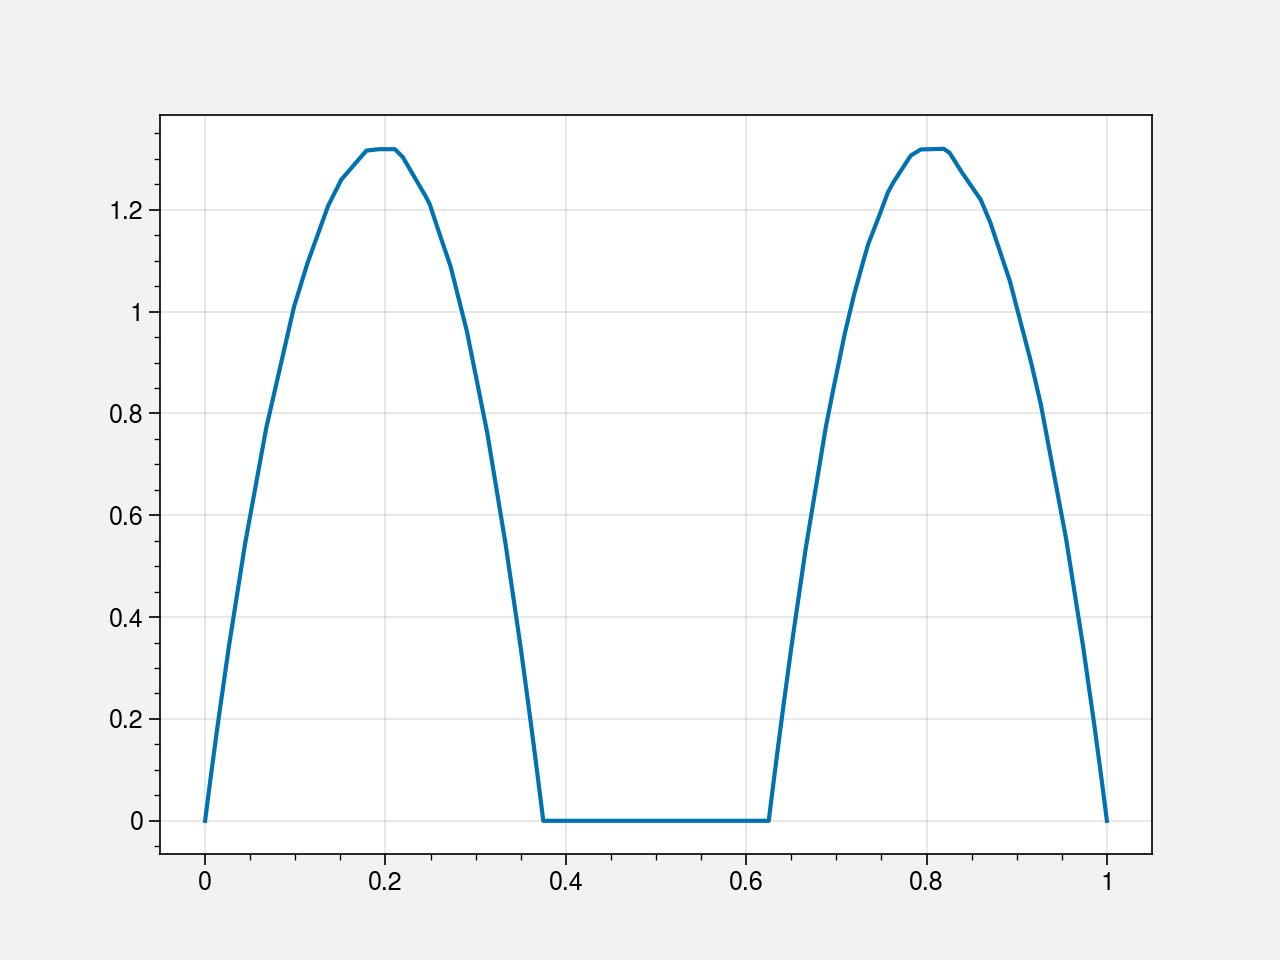

In [12]:
plt.plot(df_comsol_x_centerline_2["y"]/H,df_comsol_x_centerline_2["u (m/s) @ t=0.002"]/umax)

## read Ux at first-obstacle-y-centerline from DBS 

In [13]:
x_centerline_file_dbs_2="../postProcessing/singleGraph/1.5/y-centerline_U.csv"
df_dbs_x_centerline_2=pd.read_csv(x_centerline_file_dbs_2)
df_dbs_x_centerline_2.head()

,y,U_0,U_1,U_2
0,5.000000e-07,0.000587,-4.754840e-07,0
1,1.500000e-06,0.001476,-2.279690e-06,0
2,2.500000e-06,0.002300,-5.999470e-06,0
3,3.500000e-06,0.003058,-1.159990e-05,0
4,4.500000e-06,0.003754,-1.892030e-05,0


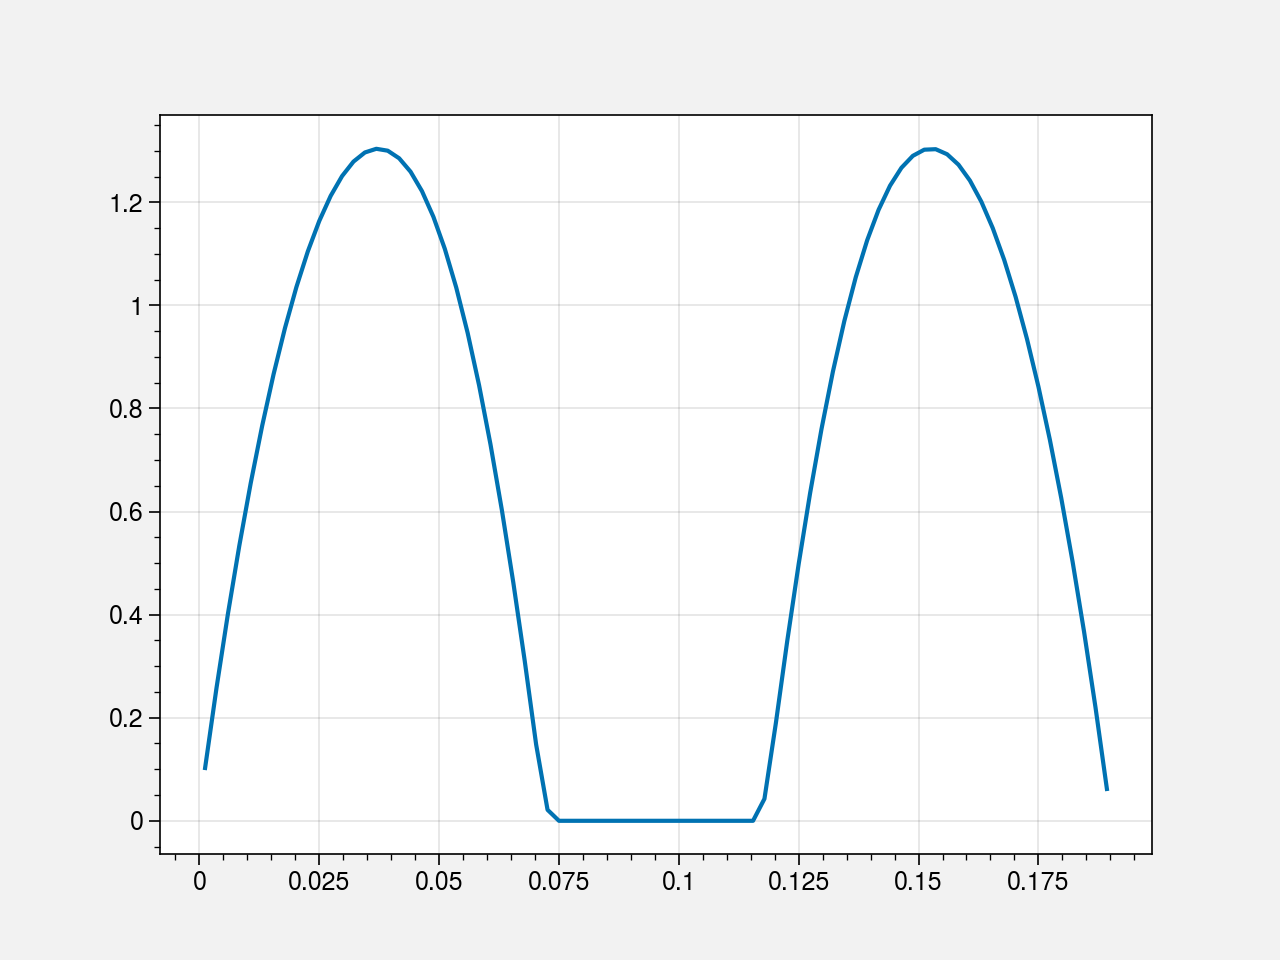

In [14]:
plt.plot(df_dbs_x_centerline_2["y"]/L,df_dbs_x_centerline_2["U_0"]/umax)

## Compare Ux at first-obstacle-y-centerline 

In [15]:
interp_f2=interpolate.interp1d(df_comsol_x_centerline_2["y"],df_comsol_x_centerline_2["u (m/s) @ t=0.002"],kind="linear")
df_comsol_x_centerline_interpolated_2=interp_f2(df_dbs_x_centerline_2["y"])

In [16]:
relative_error_ux_2=0.0
num=0
for i in df_dbs_x_centerline_2.index:
    benmark=df_comsol_x_centerline_interpolated_2[i]
    dbs=df_dbs_x_centerline_2["U_0"][i]
    if(benmark>1e-16):
        num+=1
        error=(dbs-benmark)/benmark   
        relative_error_ux_2+=pow(error,2)

relative_error_ux_2=math.sqrt(relative_error_ux_2)/num
print(f"non-zero ux num: {num}")
print(f"relative_error_ux_2: {relative_error_ux_2*100}%")


non-zero ux num: 60
relative_error_ux_2: 2.4618758726296144%


<ipython-input-17-aa65adbddedf>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(df_dbs_x_centerline_sampling_2["y"]/H,df_dbs_x_centerline_sampling_2["U_0"]/umax,color="",marker="o",s=15,edgecolors="r",label="DBS")


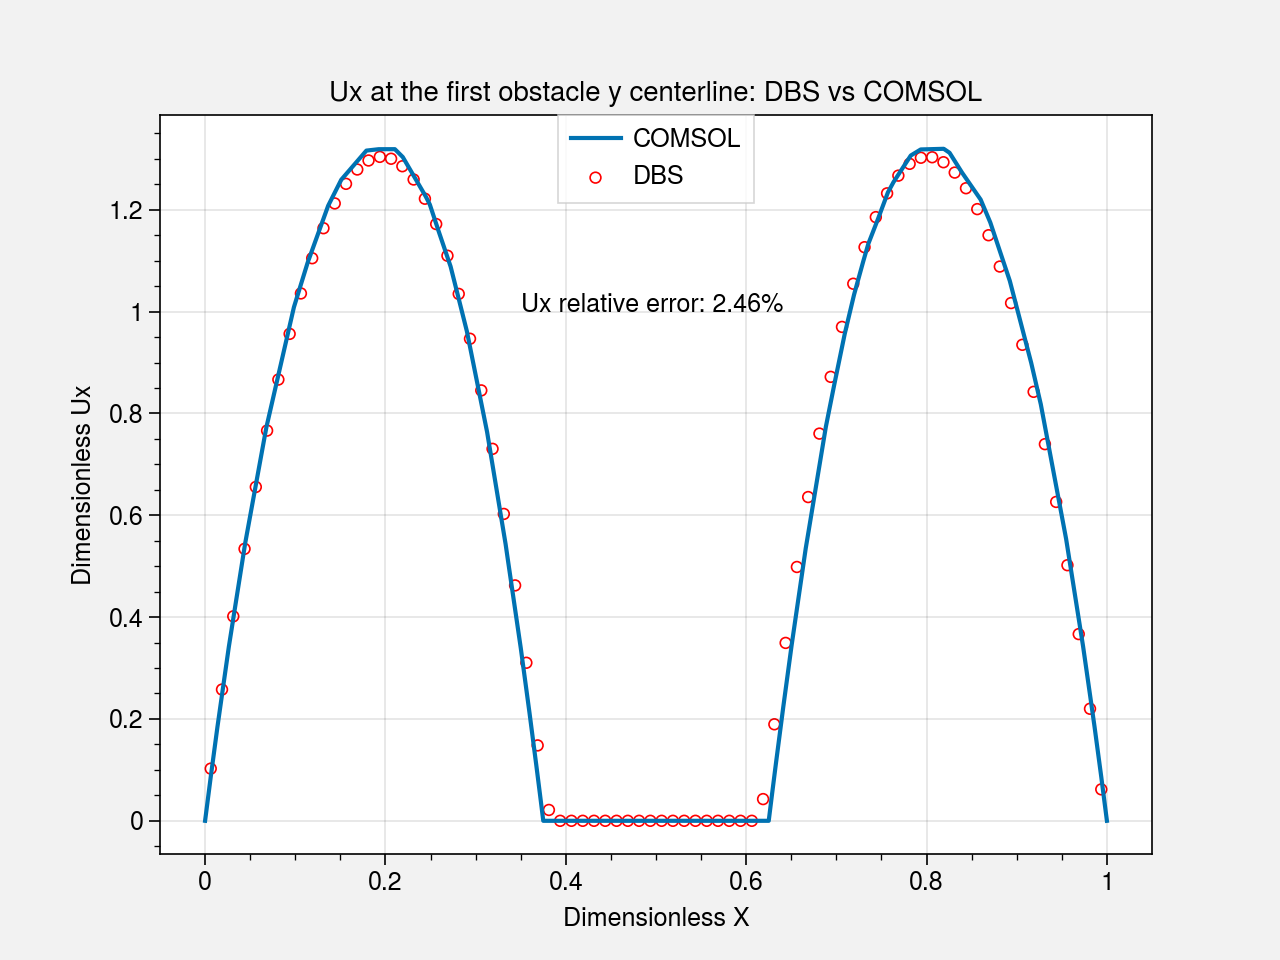

In [17]:
df_dbs_x_centerline_sampling_2=df_dbs_x_centerline_2[df_dbs_x_centerline_2.index%1==0]
fig, ax = plt.subplots()
ax.plot(df_comsol_x_centerline_2["y"]/H,df_comsol_x_centerline_2["u (m/s) @ t=0.002"]/umax,label="COMSOL")
ax.scatter(df_dbs_x_centerline_sampling_2["y"]/H,df_dbs_x_centerline_sampling_2["U_0"]/umax,color="",marker="o",s=15,edgecolors="r",label="DBS")
ax.set_xlabel("Dimensionless X")
ax.set_ylabel("Dimensionless Ux")
ax.set_title("Ux at the first obstacle y centerline: DBS vs COMSOL")
ax.text(0.35,1.0,"Ux relative error: {:.2f}%".format(relative_error_ux_2*100))
ax.legend(loc="upper center")